In [31]:
import numpy as np
import pandas as pd

from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=2)

%matplotlib inline
# %matplotlib notebook

In [32]:
recipies=pd.read_csv('data.csv')
print(recipies.head())
# print(recipies)

      type  flour  milk  sugar  butter  egg  baking powder  vanilla  salt
0  cupcake      0     9     36      23   36             27       33    22
1   muffin     79    63     55      95   52             72       98    85
2  cupcake      8    36     46       7   26             23       34     8
3  cupcake     16    41      5      39   22             48       48    24
4   muffin     54    50     59      96   69             90       72    65


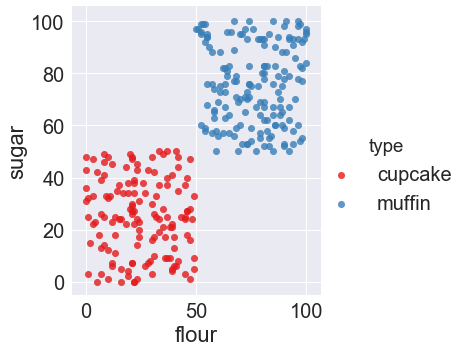

In [33]:
# sns.lmplot("flour","sugar",data=recipies,markers='*',size=6,order=0,scatter=True,fit_reg=False)
sns.lmplot(x="flour",
           y="sugar",
           data=recipies,
#            markers=["o"],
           hue='type',
           palette='Set1',
           fit_reg=False,
           scatter_kws={'s':50},
#            col='type'
           
          )
# plt.show()


In [26]:
type_label=np.where(recipies['type']=='muffin',0,1)
# print(type_label)
recipie_features=recipies.columns.values[1:].tolist()
# print(recipie_features)
ingredients= recipies[['flour','sugar']].values
# .tolist()
# print(ingredients)

In [27]:
model=svm.SVC(kernel='linear',probability=True)
model.fit(ingredients,type_label)
# print(model.decision_function)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
# print(model.predict([[60,60]]))
def check(flour,milk):
    
    if(model.predict([[flour,milk]])==0):
        return 'muffin',model.predict_proba([[flour,milk]])
    else:
        return 'cupcake',model.predict_proba([[flour,milk]])


In [29]:
#  from create_data import create_test_data

# create_test_data()
test_data=pd.read_csv('test.csv')
l=test_data[['type','flour','milk']].values

for data in l:
    type=data[0]
    flour=data[1]
    milk=data[2]
    res=check(flour,milk)
    prediction=res[0]
    prob=res[1]
#     print("{}\t{}\t{}\t:\t{}".format(prediction==type,prob, type,prediction))
#     if(prediction==False):
    if prediction==type:
        print('{} flour:{} milk:{} {}({})'.format(prediction==type,flour,milk,prediction,type))
    else:
        print('\t\t\t\t\t{} flour:{} milk:{} {}({})'.format(prediction==type,flour,milk,prediction,type))


True flour:0 milk:9 cupcake(cupcake)
True flour:36 milk:27 cupcake(cupcake)
True flour:35 milk:45 cupcake(cupcake)
True flour:79 milk:63 muffin(muffin)
True flour:95 milk:52 muffin(muffin)
True flour:48 milk:35 cupcake(cupcake)
True flour:8 milk:36 cupcake(cupcake)
True flour:76 milk:73 muffin(muffin)
True flour:69 milk:66 muffin(muffin)
True flour:89 milk:72 muffin(muffin)
True flour:5 milk:4 cupcake(cupcake)
True flour:59 milk:96 muffin(muffin)
True flour:40 milk:22 cupcake(cupcake)
True flour:66 milk:58 muffin(muffin)
True flour:1 milk:45 cupcake(cupcake)
True flour:4 milk:49 cupcake(cupcake)
True flour:91 milk:86 muffin(muffin)
True flour:92 milk:75 muffin(muffin)
True flour:21 milk:48 cupcake(cupcake)
True flour:1 milk:27 cupcake(cupcake)
True flour:9 milk:35 cupcake(cupcake)
True flour:57 milk:74 muffin(muffin)
True flour:69 milk:80 muffin(muffin)
True flour:80 milk:52 muffin(muffin)
True flour:77 milk:95 muffin(muffin)
True flour:24 milk:35 cupcake(cupcake)
True flour:9 milk:9 c